![](./img/dl_banner.jpg)

# Pytorch实现梯度下降与线性回归

![](img/pytorch.jpg)

部分源代码：[Github:zihaopytorch](https://github.com/TommyZihao/zihaopytorch)


# 接下来你将做什么

在本案例中，你将使用Pytorch构建线性回归模型，最小化均方误差，通过梯度下降算法训练权重和偏置项。

本案例展示了pytorch的模型定义、超参数定义、损失函数、优化器、前向传播、反向传播、模型评估、可视化、模型存储的完整过程。

## 1.导入工具库

In [1]:
import torch 
import torch.nn as nn # 导入pytorch的nn神经网络模块
import numpy as np # 导入数组计算库numpy
import matplotlib.pyplot as plt # 导入可视化库matplotlib

# 让matplotlib画出的图嵌入在notebook中
%matplotlib inline  

## 2.准备数据

In [2]:
# 构造训练数据的特征
x_train = np.array([[3.3], [4.6], [5.3], [6.7], [6.3], [4.18], 
                    [9.9], [6.182], [7.6], [2.1], [7.02], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

# 构造训练数据的标签
y_train = np.array([[1.7], [2.6], [2.1], [3.2], [1.6], [1.573], 
                    [3.6], [2.9], [2.5], [1.2], [2.8], 
                    [3.6], [1.65], [2.4], [1.3]], dtype=np.float32)

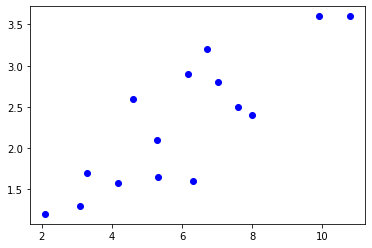

In [3]:
plt.plot(x_train,y_train,'bo')

In [4]:
# 查看训练数据的特征维度，共有15个数据，每个数据只有一个特征
x_train.shape

(15, 1)

In [5]:
# 查看训练数据的标签维度，共有15个数据，每个数据只有一个标签
y_train.shape

(15, 1)

## 3.构建模型、定义损失函数与优化器

In [6]:
input_size = 1 # 输入数据的维度
output_size = 1 # 输出数据的维度
model = nn.Linear(input_size, output_size) # 定义线性模型，输入维度为input_size，输出维度为output_size

# 损失与优化器
criterion = nn.MSELoss() # 损失函数为MSE均方误差损失函数
learning_rate = 0.001 # 定义学习率
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # 随机梯度下降优化器，学习率0.001

## 4.迭代与训练

In [7]:
inputs = torch.from_numpy(x_train) # 将x_train转为Pytorch的张量数据类型
targets = torch.from_numpy(y_train) # 将y_train转为Pytorch的张量数据类型
outputs = model(inputs) # 使用刚刚构建的尚未训练的模型预测一下

In [8]:
outputs

tensor([[-2.3583],
        [-3.2165],
        [-3.6786],
        [-4.6028],
        [-4.3387],
        [-2.9392],
        [-6.7152],
        [-4.2608],
        [-5.1969],
        [-1.5661],
        [-4.8140],
        [-7.3034],
        [-3.6872],
        [-5.4590],
        [-2.2263]], grad_fn=<AddmmBackward>)

In [9]:
# 将outputs由Pytorch的Tensor张量数据类型转为numpy的array数据类型
outputs = outputs.detach().numpy()

In [10]:
outputs

array([[-2.3583097],
       [-3.2164893],
       [-3.678586 ],
       [-4.602779 ],
       [-4.338724 ],
       [-2.9392314],
       [-6.7152205],
       [-4.2608275],
       [-5.196903 ],
       [-1.5661442],
       [-4.814023 ],
       [-7.303404 ],
       [-3.6871681],
       [-5.458978 ],
       [-2.2262821]], dtype=float32)

绘制模型训练之前的拟合结果，可以看出效果很差

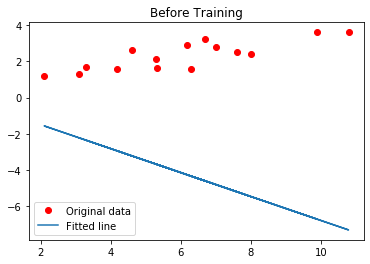

In [12]:
plt.plot(x_train, y_train, 'ro', label='Original data') # 绘制原始数据散点图
plt.plot(x_train, outputs, label='Fitted line') # 绘制拟合直线，注意这里的outputs已经变成了numpy的array数组
plt.legend() # 显示图例
plt.title('Before Training') # 图表标题
plt.show() # 展示图像

开始训练

In [13]:
num_epochs = 350 # 迭代轮次，一个轮次指的是完整过一遍全部的数据
loss_list = [] # 将训练过程中的损失放在loss_list列表里
for epoch in range(num_epochs):
    
    # 把numpy的array数据类型转成pytorch的Tensor类型，定义好训练特征和标签
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向计算
    outputs = model(inputs) # 获取模型当前推断结果
    loss = criterion(outputs, targets) # 计算当前模型输出值与标签y的均方误差
    loss_list.append(loss.item()) # 将损失值存入loss_list列表
    
    # 反向传播与优化
    optimizer.zero_grad() # 将各权重的梯度归零，如果没有这行代码，梯度会累加
    loss.backward() # 计算损失函数对各权重的梯度
    optimizer.step() # 按学习率更新权重值
    
    # 每训练5轮，就输出当前的损失值
    if (epoch+1) % 5 == 0: 
        print('目前进程 [{}/{}], 当前损失: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

目前进程 [5/350], 当前损失: 23.0903
目前进程 [10/350], 当前损失: 9.5845
目前进程 [15/350], 当前损失: 4.0582
目前进程 [20/350], 当前损失: 1.7970
目前进程 [25/350], 当前损失: 0.8717
目前进程 [30/350], 当前损失: 0.4930
目前进程 [35/350], 当前损失: 0.3380
目前进程 [40/350], 当前损失: 0.2744
目前进程 [45/350], 当前损失: 0.2484
目前进程 [50/350], 当前损失: 0.2376
目前进程 [55/350], 当前损失: 0.2331
目前进程 [60/350], 当前损失: 0.2312
目前进程 [65/350], 当前损失: 0.2303
目前进程 [70/350], 当前损失: 0.2298
目前进程 [75/350], 当前损失: 0.2296
目前进程 [80/350], 当前损失: 0.2294
目前进程 [85/350], 当前损失: 0.2292
目前进程 [90/350], 当前损失: 0.2290
目前进程 [95/350], 当前损失: 0.2289
目前进程 [100/350], 当前损失: 0.2287
目前进程 [105/350], 当前损失: 0.2286
目前进程 [110/350], 当前损失: 0.2284
目前进程 [115/350], 当前损失: 0.2283
目前进程 [120/350], 当前损失: 0.2281
目前进程 [125/350], 当前损失: 0.2280
目前进程 [130/350], 当前损失: 0.2278
目前进程 [135/350], 当前损失: 0.2277
目前进程 [140/350], 当前损失: 0.2275
目前进程 [145/350], 当前损失: 0.2274
目前进程 [150/350], 当前损失: 0.2273
目前进程 [155/350], 当前损失: 0.2271
目前进程 [160/350], 当前损失: 0.2270
目前进程 [165/350], 当前损失: 0.2268
目前进程 [170/350], 当前损失: 0.2267
目前进程 [175/350], 当前损失: 0.2265
目前进程

## 6.可视化与结果展示

绘制模型训练过程中损失值的下降曲线图

Text(0.5, 1.0, 'Training loss')

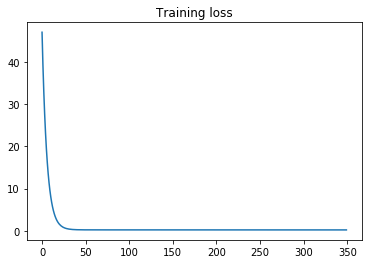

In [14]:
plt.plot(loss_list)
plt.title('Training loss')

获取最终回归拟合结果

In [15]:
outputs = model(inputs)

In [16]:
outputs

tensor([[1.2367],
        [1.7127],
        [1.9690],
        [2.4816],
        [2.3352],
        [1.5589],
        [3.6534],
        [2.2919],
        [2.8112],
        [0.7973],
        [2.5988],
        [3.9796],
        [1.9737],
        [2.9565],
        [1.1634]], grad_fn=<AddmmBackward>)

In [17]:
# 跟上面一样，将outputs从Pytorch的Tensor张量数据类型转为numpy的array数组类型
outputs = outputs.detach().numpy()

In [18]:
outputs

array([[1.236657 ],
       [1.7126724],
       [1.9689884],
       [2.4816203],
       [2.3351543],
       [1.5588827],
       [3.6533506],
       [2.2919466],
       [2.8111696],
       [0.7972582],
       [2.5987935],
       [3.9796045],
       [1.9737486],
       [2.9565375],
       [1.1634238]], dtype=float32)

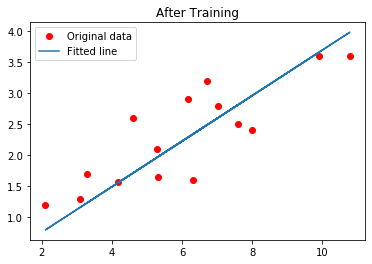

In [19]:
plt.plot(x_train, y_train, 'ro', label='Original data') # 绘制原始数据散点图
plt.plot(x_train, outputs, label='Fitted line') # 绘制拟合直线
plt.legend() # 显示图例
plt.title('After Training') # 设置图表标题
plt.show() # 展示图像

In [20]:
# 存储模型到当前文件所在目录
torch.save(model.state_dict(), './linear_regression_model.ckpt')

# 参考学习资料

Pytorch官方文档：https://pytorch.org/

